In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from jammer.utils import NonNegMaxMeanSquareNorm

2023-12-18 18:57:51.999629: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 18:57:52.029823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 18:57:52.553992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# filenames = [
#     'weights/L1 over bit estimates.pickle',
#     'weights/MSE over bit estimates.pickle',
#     'weights/log over bit estimates.pickle',
#     'weights/L1 over symbols.pickle',
#     'weights/MSE over symbols.pickle',
# ]
# shape = [14, 128]

# filenames = [
#     'weights/BCE over bit estimates (logits) symbol_weights.pickle',
#     'weights/L1 over bit estimates symbol_weights.pickle',
#     'weights/L1 over symbols symbol_weights.pickle',
#     'weights/log over bit estimates symbol_weights.pickle',
#     'weights/MSE over bit estimates symbol_weights.pickle',
#     'weights/MSE over symbols symbol_weights.pickle',
# ]
# shape = [14, 1]

# snrs = np.arange(-5, 10.5, 2.5, dtype=np.float32)
# filenames = [f"weights/{ebno_db}db.pickle" for ebno_db in snrs]
# shape = [14, 128]

# snrs = np.arange(-5, 10.5, 2.5, dtype=np.float32)
# filenames = [f"weights/{ebno_db}dB_relufix.pickle" for ebno_db in snrs]
# shape = [14, 128]

ues = np.arange(1, 5, dtype=np.int32)
filenames = [f"weights/ue_{ue}_relufix.pickle" for ue in ues]
filenames += [f"weights/ue_{ue}_constraint.pickle" for ue in ues]
filenames += [f"weights/ue_{ue}_relufix_constraint.pickle" for ue in ues]
shape = [14, 128]

2023-12-18 18:57:54.087367: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 888 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:46:00.0, compute capability: 8.9
2023-12-18 18:57:54.088297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14676 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:49:00.0, compute capability: 8.9
2023-12-18 18:57:54.088915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 15034 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:4e:00.0, compute capability: 8.9
2023-12-18 18:57:54.089501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 15034 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 4090, 

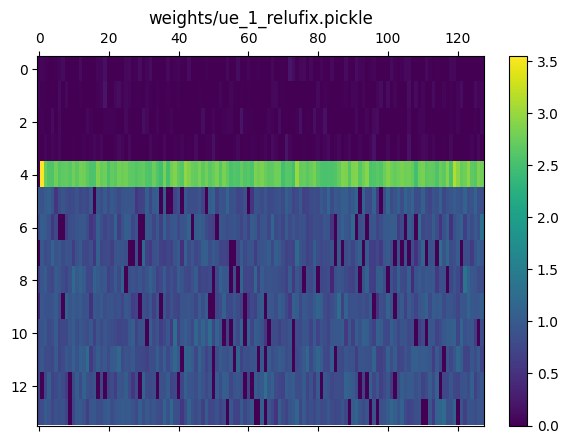

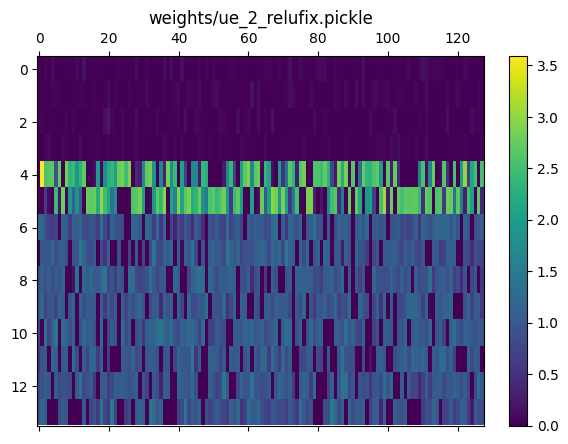

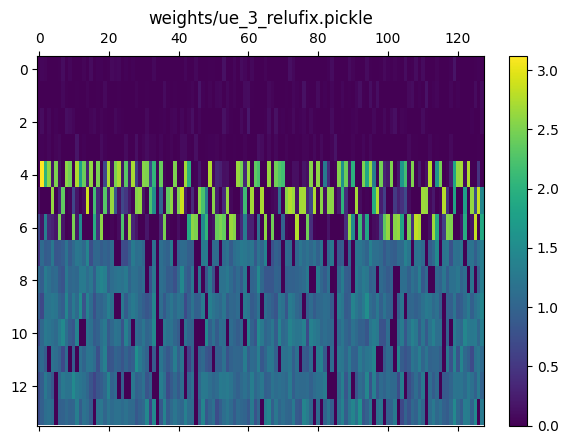

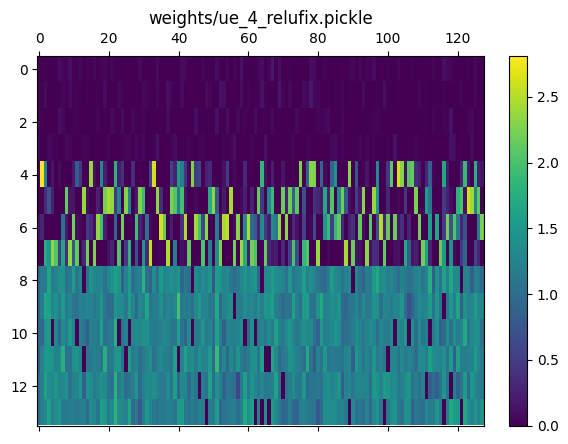

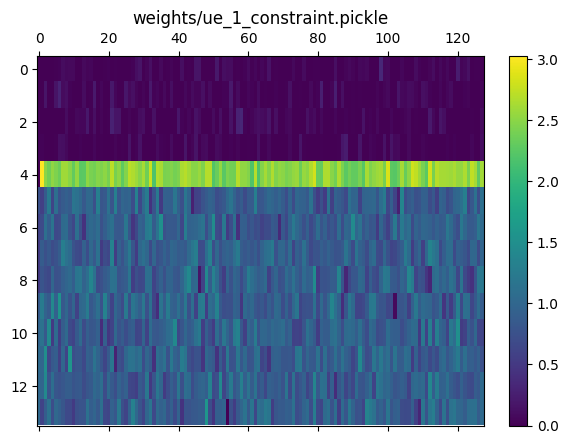

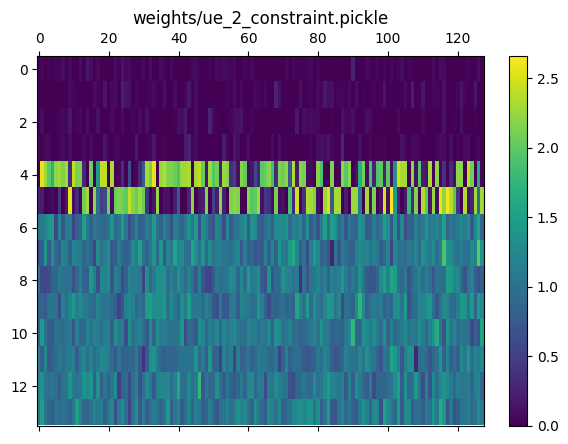

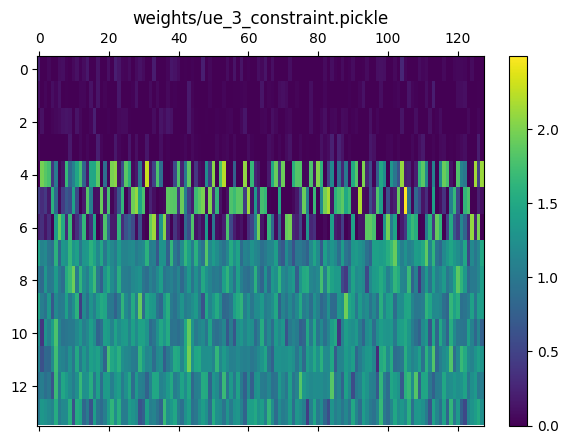

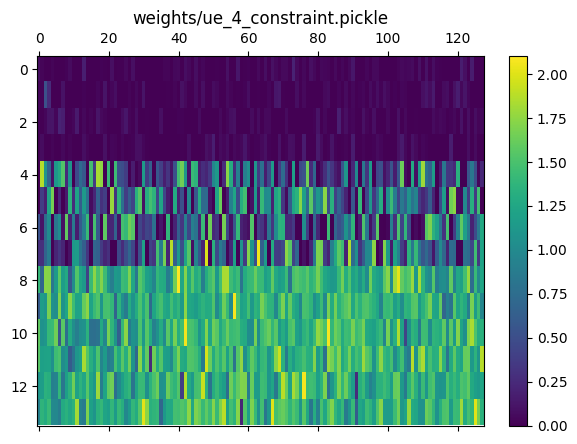

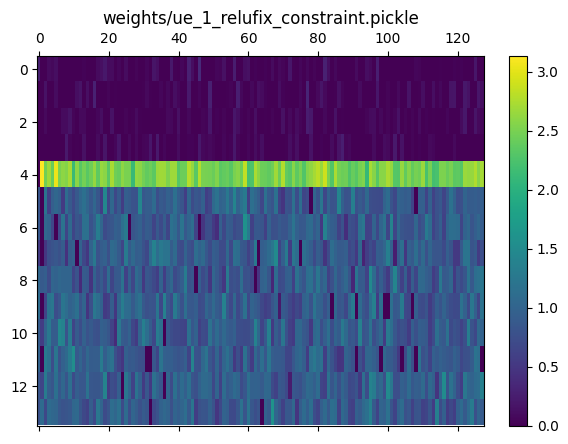

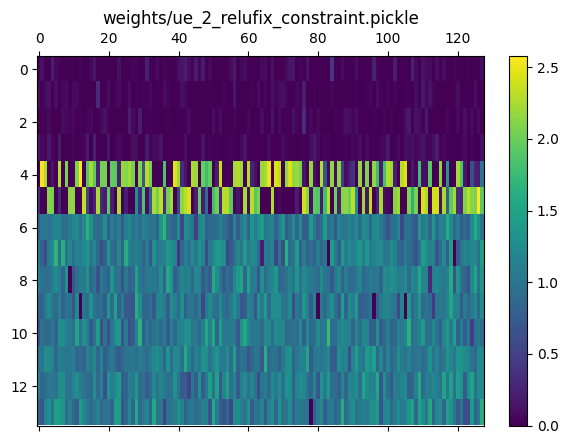

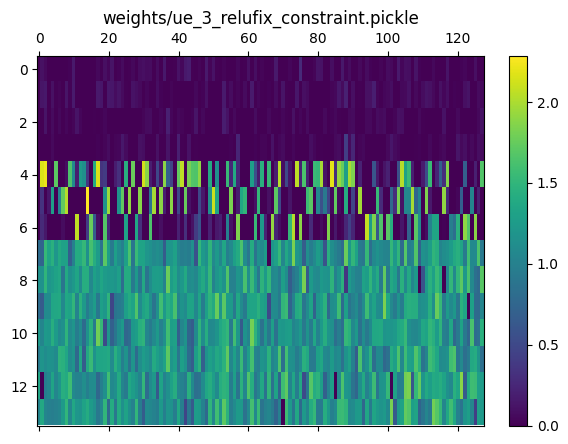

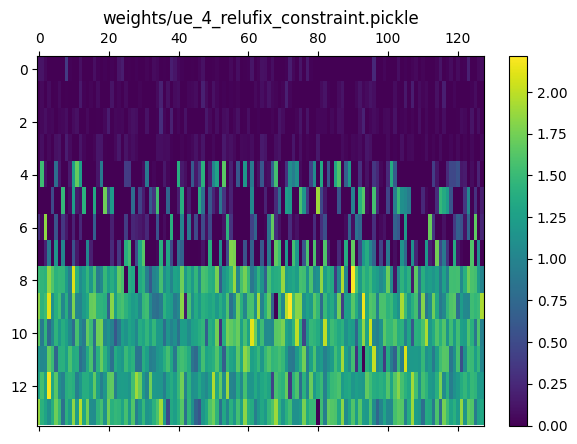

In [3]:
for filename in filenames:
    with open(filename, 'rb') as f:
        data = pickle.load(f)[0]
        data = np.reshape(data, shape)
        # weights are in domain MaxMeanSquareNorm, but we want to only see the absolute values
        data = NonNegMaxMeanSquareNorm()(data)
        fig, ax = plt.subplots()
        im = ax.matshow(data, aspect='auto')
        ax.set_title(filename)
        fig.colorbar(im, fraction=0.05)